介绍：参考https://www.cnblogs.com/pinard/p/6016029.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
# 评价
from sklearn import metrics
# 交叉验证
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# read_csv里面的参数是csv在你电脑上的路径，此处csv文件放在notebook运行目录下面的CCPP目录里
data = pd.read_csv('./CCPP/Folds5x2_pp.csv')

In [3]:
data,data.shape

(         AT      V       AP     RH      PE
 0      8.34  40.77  1010.84  90.01  480.48
 1     23.64  58.49  1011.40  74.20  445.75
 2     29.74  56.90  1007.15  41.91  438.76
 3     19.07  49.69  1007.22  76.79  453.09
 4     11.80  40.66  1017.13  97.20  464.43
 ...     ...    ...      ...    ...     ...
 9563  15.12  48.92  1011.80  72.93  462.59
 9564  33.41  77.95  1010.30  59.72  432.90
 9565  15.99  43.34  1014.20  78.66  465.96
 9566  17.65  59.87  1018.58  94.65  450.93
 9567  23.68  51.30  1011.86  71.24  451.67
 
 [9568 rows x 5 columns], (9568, 5))

In [4]:
data.shape

(9568, 5)

In [5]:
# 特征：
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [6]:
# 输出值
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [7]:
# 划分训练集与测试集

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# 模型评价
# 模型拟合测试集
y_pred = linreg.predict(X_test)

# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.080401202073897
RMSE: 4.481116066570236


In [45]:
# 交叉验证
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
linreg2 = LinearRegression()
predicted = cross_val_predict(linreg2, X, y, cv=10)
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 20.795597461943107
RMSE: 4.560219014690315


pandas.core.frame.DataFrame

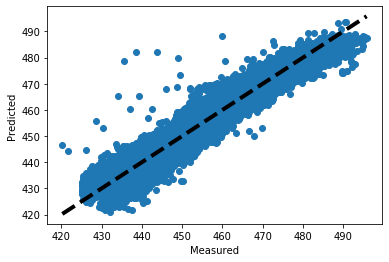

In [27]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [29]:
# L2正则化
from sklearn.linear_model import RidgeCV


In [30]:
# 用scikit-learn选择Ridge回归超参数α
# 这里我们假设我们想在这10个α
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100])
ridgecv.fit(X_train, y_train)
ridgecv.alpha_  

7.0

In [44]:
ridgecv.coef_

array([[-1.9735619 , -0.23236602,  0.06940066, -0.1580361 ]])

研究L2中alpha影响

In [31]:
# X is a 10x10 matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y is a 10 x 1 vector
y = np.ones(10)

In [36]:
n_alphas = 200
# alphas count is 200, 都在10的-10次方和10的-2次方之间
alphas = np.logspace(-10, -2, n_alphas)

In [40]:
# 我们做200次循环，分别求出各个超参数对应的θ(10个维度)，存起来后面画图用
clf = linear_model.Ridge(fit_intercept=False)
coefs = []
# 循环200次
for a in alphas:
    #设置本次循环的超参数
    clf.set_params(alpha=a)
    #针对每个alpha做ridge回归
    clf.fit(X, y)
    # 把每一个超参数alpha对应的theta存下来
    coefs.append(clf.coef_)

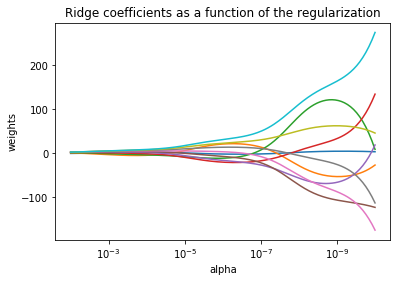

In [41]:

#将alpha的值取对数便于画图
ax.set_xscale('log')
#翻转x轴的大小方向，让alpha从大到小显示
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()